# 프로젝트: 나랑 닮은 연예인을 찾아보자

이번 프로젝트는 face_embedding을 활용한 나랑 닮은 연예인 찾기입니다!  
우선 제 사진들을 통해 임베딩 벡터 거리를 구해본 뒤, 여러 이미지들간의 임베딩 벡터 거리를 비교하여 닮은 연예인을 찾아보도록 하겠습니다!

## Step 1. 사진 모으기

구글링을 통해서 비교할 연예인 사진들을 모으도록 하겠습니다.  
제 사진도 3장 정도 준비해서 비교해보도록 하겠습니다.

## Step2. 얼굴 영역 자르기

임베딩 추출을 위해 얼굴 영역을 잘라줘야 합니다.  
이미지에서 얼굴 영역만을 추출하여 저장해주겠습니다.

In [1]:
import face_recognition
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

제 사진을 통해 얼굴이 잘 추출되었나 확인해 보겠습니다.

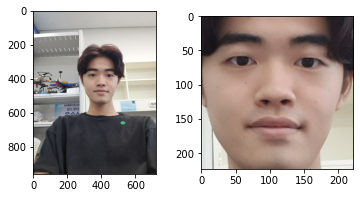

In [3]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity'

my_selfie_path = os.path.join(dir_path,'박정호1.jpg')

my_selfie = plt.imread(my_selfie_path)

my_face = get_gropped_face(my_selfie_path)

plt.figure(figsize=(6,3))

plt.subplot(1, 2, 1)
plt.imshow(my_selfie)

plt.subplot(1, 2, 2)
plt.imshow(my_face)

plt.show()

네.. 멀리서 볼땐 몰랐는데 지금 매우 피곤에 절어 있었군요. 다음단계로 넘어가겠습니다!

## Step3. 얼굴 영역의 임베딩 추출하기

In [4]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [5]:
embedding = get_face_embedding(my_face)

In [6]:
embedding

[array([-0.13810131,  0.07725312,  0.01197488, -0.08470067, -0.08352526,
        -0.08482217, -0.10190679, -0.09506848,  0.05375209, -0.07410506,
         0.2055051 , -0.07218876, -0.15627922, -0.15193847, -0.07690877,
         0.18357183, -0.20852777, -0.13726935,  0.00751426,  0.01328761,
         0.12527703, -0.03758354, -0.01992838,  0.05733097, -0.09864672,
        -0.35970396, -0.09221727, -0.07215162, -0.02734405,  0.02510786,
        -0.02565149,  0.05319986, -0.19601223, -0.05379552,  0.04920784,
         0.08109614,  0.02604405, -0.03755245,  0.11742669, -0.01174842,
        -0.20439725,  0.03768477,  0.10962457,  0.24132426,  0.2179127 ,
         0.06176272,  0.06460557, -0.11168379,  0.12821735, -0.15963486,
         0.0312945 ,  0.14417778,  0.11784116,  0.07330264, -0.00982985,
        -0.12111704,  0.09442893,  0.12183455, -0.15345076,  0.02554478,
         0.07024545, -0.0817226 ,  0.01725828, -0.05395817,  0.2517525 ,
         0.05531356, -0.14773698, -0.14733911,  0.1

또 저의 다른 사진들도 불러와 이미지들을 임베딩시켜 이미지들간의 벡터 거리를 구해보겠습니다.

In [7]:
my_selfie_path_2 = os.path.join(dir_path,'박정호2.jpg')
my_selfie_path_3 = os.path.join(dir_path,'박정호3.jpg')

my_face_2 = get_gropped_face(my_selfie_path_2)
my_face_3 = get_gropped_face(my_selfie_path_3)

embedding_2 = get_face_embedding(my_face_2)
embedding_3 = get_face_embedding(my_face_3)

In [8]:
distances = np.linalg.norm([embedding_2[0], embedding_3[0]] - embedding[0], axis=1, ord=2)
print("Distance between my face1 and my face2: {}".format(distances[0]))
print("Distance between my face1 and my face3: {}".format(distances[1]))

Distance between my face1 and my face2: 0.3373505079678356
Distance between my face1 and my face3: 0.39716906871192587


1번과 2번 사진은 가깝다고 느끼는데 3번은 비교적 안 닮았다고 느끼나 봅니다..!  
이제 이 과정을 확장시켜 함수로 만든뒤 닮은 연예인을 찾아보도록 하겠습니다~~

## Step4. 모은 연예인들과 비교하기

디렉토리 안에 있는 모든 연예인 사진들의 얼굴을 추출한뒤 임베딩 시키는 함수를 만들겠습니다.

In [9]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
        
    return embedding_dict

In [10]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity'
file_list = os.listdir(dir_path)
#print ("file_list: {}".format(file_list))

In [11]:
embedding_dict = get_face_embedding_dict(dir_path)

### 사진들간의 거리구하기

In [12]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

특정 이름을 입력하면 닮은 인물을 뽑아내는 함수를 만들도록 하겠습니다.

In [13]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [14]:
def get_nearest_face(name, top=7):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [15]:
get_nearest_face('박정호1')

순위 1 : 이름(박정호2), 거리(0.33735050796783567)
순위 2 : 이름(박정호3), 거리(0.39716906871192587)
순위 3 : 이름(RM), 거리(0.417256444960889)
순위 4 : 이름(온앤오프효진), 거리(0.44233922934556447)
순위 5 : 이름(정수빈), 거리(0.4462381112498154)
순위 6 : 이름(디오), 거리(0.45139787324291225)
순위 7 : 이름(최민용), 거리(0.4524168927299938)


결과가 잘 나온것 같습니다! 이 함수를 이미지화 시켜서 좀 더 직관적으로 확인할 수 있도록 해보겠습니다.

## 닮은 연예인 결과 시각화 해보기

이미지의 이름 바꿔 저장하는 법  
참고사이트: https://ponyozzang.tistory.com/600

얼굴만 따로 모아서 다른 폴더에 저장해주도록 하겠습니다!

In [16]:
from PIL import Image

file_list = os.listdir(dir_path)

for file in file_list:
    title, ext = os.path.splitext(file)
    img_path = os.path.join(dir_path, file)
    face = get_gropped_face(img_path)
    pillow_image = Image.fromarray(face)
    pillow_image.save(dir_path+'/../celebrity_face/'+title + '_face' + '.jpg')

get_nearest_face() 함수에 시각화 기능 추가시키기

In [17]:
def show_the_nearest_face(name, top=7):
    
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    
    face_dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity_face'
    plt.figure(figsize=(12,6))
    
    for i in range(1,8,1):
        img_path = face_dir_path + '/'+ sorted_faces[i][0] +'_face' + '.jpg'
        face = plt.imread(img_path)
        plt.subplot(1,8,i)
        fig = plt.imshow(face)
        fig.set_cmap('hot')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)

이미지 표시 참고 사이트: https://qastack.kr/programming/9295026/matplotlib-plots-removing-axis-legends-and-white-spaces

순위 1 : 이름(박정호2), 거리(0.33735050796783567)
순위 2 : 이름(박정호3), 거리(0.39716906871192587)
순위 3 : 이름(RM), 거리(0.417256444960889)
순위 4 : 이름(온앤오프효진), 거리(0.44233922934556447)
순위 5 : 이름(정수빈), 거리(0.4462381112498154)
순위 6 : 이름(디오), 거리(0.45139787324291225)
순위 7 : 이름(최민용), 거리(0.4524168927299938)


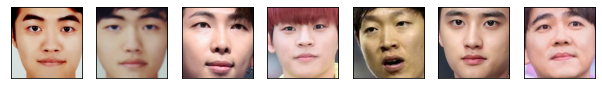

In [18]:
show_the_nearest_face('박정호1')

순위 1 : 이름(박정호1), 거리(0.33735050796783567)
순위 2 : 이름(박정호3), 거리(0.34004654599992995)
순위 3 : 이름(진), 거리(0.4334884515683103)
순위 4 : 이름(씨잼), 거리(0.43467082301059345)
순위 5 : 이름(디오), 거리(0.4559578004296468)
순위 6 : 이름(최민용), 거리(0.45994462687411025)
순위 7 : 이름(정형돈), 거리(0.4636523448860644)


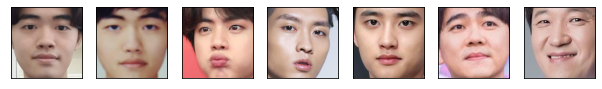

In [19]:
show_the_nearest_face('박정호2')

순위 1 : 이름(박정호2), 거리(0.34004654599992995)
순위 2 : 이름(박정호1), 거리(0.39716906871192587)
순위 3 : 이름(류준열), 거리(0.40819828430293936)
순위 4 : 이름(백현), 거리(0.41311517577525203)
순위 5 : 이름(박재범), 거리(0.4208295984979178)
순위 6 : 이름(서강준), 거리(0.42536671425960015)
순위 7 : 이름(진), 거리(0.427347322881837)


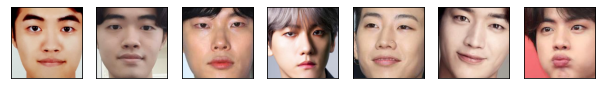

In [20]:
show_the_nearest_face('박정호3')

이미지화를 시키니 좀더 결과에 납득(?)이 가는것 같습니다!  
평소에 이분 닮았다 소리를 많이 들었는데 7위 안에 높은 확률로 계시는군요!(66%)  
이상으로 닮은 연예인 찾기를 마무리하도록 하겠습니다.

# 총평 및 결과

face_embedding을 이용하여 닮은 연예인 찾기를 해보았습니다.

get_nearest_face 함수를 사용할때 혹시 내 사진보다 임베딩 벡터 거리가 가깝게 나오는 연예인 사진이 있을까 했지만 아쉽게도 찾을 수 없었습니다.

데이터셋에서 연예인의 사진이 인물당 한 장씩 밖에 없었기 때문에 좀 더 다양한 모습을 담지 못한 것이 아닌가 생각도 듭니다.

다음에 기회가 된다면 좀 더 다양한 연예인의 사진을 추가하여 실험해보면 좋을 것 같습니다.